In [5]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

----
****
## Dataset Description
1. CRIM: per capita crime rate by town 
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft. 
3. INDUS: proportion of non-retail business acres per town 
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
5. NOX: nitric oxides concentration (parts per 10 million) 
6. RM: average number of rooms per dwelling 
7. AGE: proportion of owner-occupied units built prior to 1940 
8. DIS: weighted distances to five Boston employment centres 
9. RAD: index of accessibility to radial highways 
10. TAX: full-value property-tax rate per \$10,000 
11. PTRATIO: pupil-teacher ratio by town 
12. B: 1000(Bk - 0.63)^2 where Bk is the proportion of *blacks* by town
13. LSTAT: lower status of the population 
14. Price: Median value of owner-occupied homes in \$1000's
----
****

## Dataset analysis

In [3]:
boston=load_boston()
X=pd.DataFrame(boston.data,columns=boston.feature_names)
y=pd.DataFrame(boston.target)
y.columns=['Price']
df=pd.concat([X,y],axis=1)
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
Price      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


----
****
Clearly there are no missing values in data.
Data consists of 506 instances with 13 features and 1 dependant variable.

## Histograms

Skewness: 5.237578
Kurtosis: 37.267180


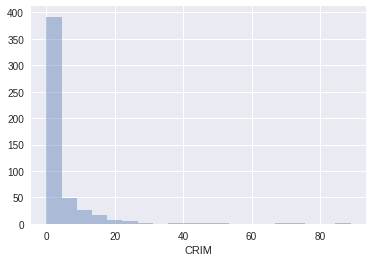

In [6]:
sns.distplot(df['CRIM'], bins=20, kde=False)
print("Skewness: %f" % df['CRIM'].skew())
print("Kurtosis: %f" % df['CRIM'].kurt())

From the histogram, It is evident that most of the towns have really low crime rate, though there is a town with 90% crime rate too (meaning that this could be an outlier). The skewness and kurtosis are 5.237578 and 37.267180.

Skewness: 2.225666
Kurtosis: 4.031510


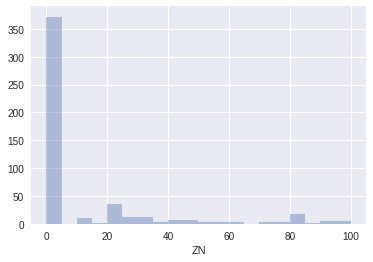

In [7]:
sns.distplot(df['ZN'], bins=20, kde=False, rug=False)
print("Skewness: %f" % df['ZN'].skew())
print("Kurtosis: %f" % df['ZN'].kurt())

ZN is the proportion of residential places for lots over 25,000 sq. ft. There are some towns which are fully residential too. The skewness and kurtosis are 2.225666 and 4.031510.

Skewness: 0.295022
Kurtosis: -1.233540


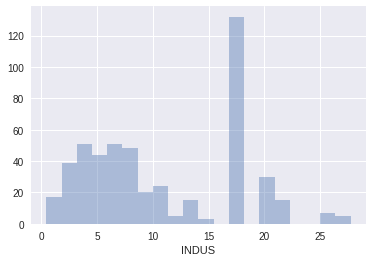

In [8]:
sns.distplot(df['INDUS'], bins=20, kde=False, rug=False)
print("Skewness: %f" % df['INDUS'].skew())
print("Kurtosis: %f" % df['INDUS'].kurt())

A lot of towns have proportion of non-retail business around 17%. No towns have proportion of non-retail businesses above 30%. The skewness is 0.295022 and the kurtosis is -1.233540.

Skewness: 3.405904
Kurtosis: 9.638264


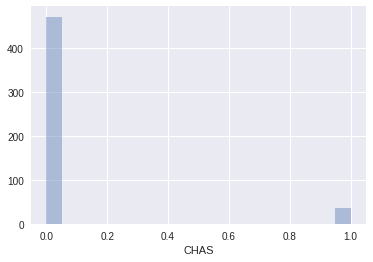

In [11]:
sns.distplot(df['CHAS'], bins=20, kde=False, rug=False)
print("Skewness: %f" % df['CHAS'].skew())
print("Kurtosis: %f" % df['CHAS'].kurt())

It is a categorical variable signifying houses bounded by the river. From the histogram, we get to know that very less number of towns have land that bounds the river.

Skewness: 0.729308
Kurtosis: -0.064667


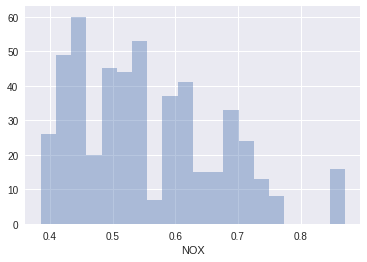

In [12]:
sns.distplot(df['NOX'], bins=20, kde=False, rug=False)
print("Skewness: %f" % df['NOX'].skew())
print("Kurtosis: %f" % df['NOX'].kurt())

From the histogram, we get to know that very few towns have NOX concentration above 0.8.

Skewness: 0.403612
Kurtosis: 1.891500


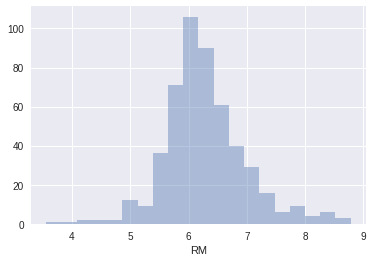

In [13]:
sns.distplot(df['RM'], bins=20, kde=False)
print("Skewness: %f" % df['RM'].skew())
print("Kurtosis: %f" % df['RM'].kurt())

The RM histogram represents that the average number of rooms in a house is 6. The skewness of RM is 0.4036121 and kurtosis is 1.891500.

Skewness: -0.598963
Kurtosis: -0.967716


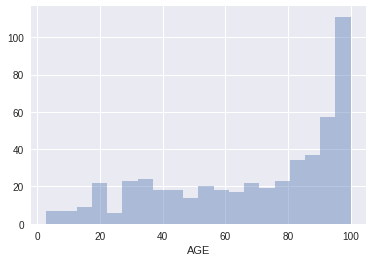

In [15]:
sns.distplot(df['AGE'],bins=20,kde=False)
print("Skewness: %f" % df['AGE'].skew())
print("Kurtosis: %f" % df['AGE'].kurt())

The histogram has a high peak for 95-100, indicating a large no. of houses built prior to 1940 in Botson. The skewness of AGE is -0.598963 and kurtosis is -0.967716.

Skewness: 1.011781
Kurtosis: 0.487941


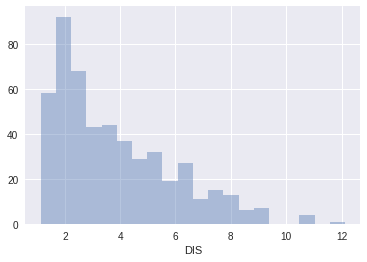

In [16]:
sns.distplot(df['DIS'],kde=False,bins=20)
print("Skewness: %f" % df['DIS'].skew())
print("Kurtosis: %f" % df['DIS'].kurt())

The histogram indicates more number of houses closer to the employment centre. The skewness of 1.011781 reassures this. The kurtosis of the feature is 0.487941.

Skewness: 1.004815
Kurtosis: -0.867232


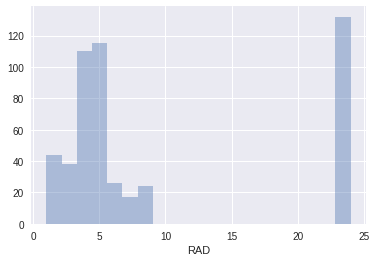

In [18]:
sns.distplot(df['RAD'],bins=20,kde=False)
print("Skewness: %f" % df['RAD'].skew())
print("Kurtosis: %f" % df['RAD'].kurt())

A large number of are in the range 1 to 9, except 132 which have a value of 24. These 132 houses have the same, disjoint index value of highway accessibility, which may be because of all these houses being at the same location. The skewness is 0.669956 and the kurtosis is -1.142408.

Skewness: 0.669956
Kurtosis: -1.142408


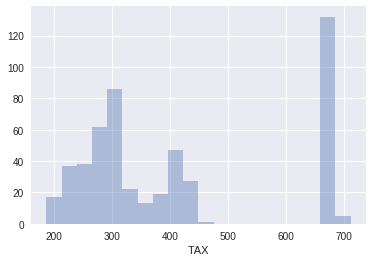

In [20]:
sns.distplot(df['TAX'],bins=20,kde=False)
print("Skewness: %f" % df['TAX'].skew())
print("Kurtosis: %f" % df['TAX'].kurt())

A trend similar to RAD can be seen, most values are present towards the left of the histogram but a proportion of them are on the right. This may be because of a possible high correlation between TAX and RAD. The skewness of TAX is 0.669956 and kurtosis is -1.142408.

Skewness: -0.802325
Kurtosis: -0.285091


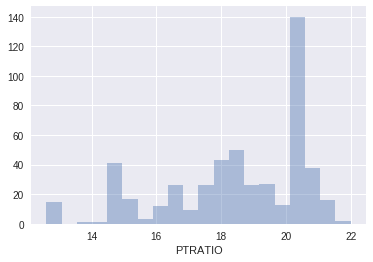

In [22]:
sns.distplot(df['PTRATIO'],bins=20,kde=False)
print("Skewness: %f" % df['PTRATIO'].skew())
print("Kurtosis: %f" % df['PTRATIO'].kurt())

The histogram indicates that most towns have a high pupil teacher ratio, the modal class being 20-20.5. 	The skewness and kurtosis are -0.802325 and -0.285091 respectively.

Skewness: -2.890374
Kurtosis: 7.226818


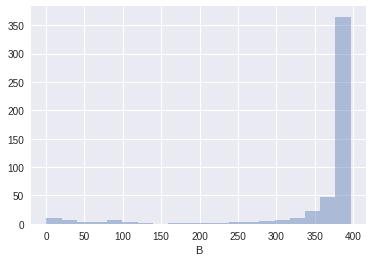

In [23]:
sns.distplot(df['B'],bins=20,kde=False)
print("Skewness: %f" % df['B'].skew())
print("Kurtosis: %f" % df['B'].kurt())

The histogram is almost perfectly left-skewed, indicating the presence of a large amount of blacks in most towns. The skewness of -2.890374 further asserts our claim. The kurtosis of B is 7.2268187.

Skewness: 0.906460
Kurtosis: 0.493240


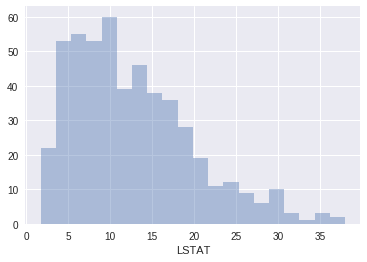

In [25]:
sns.distplot(df['LSTAT'],bins=20,kde=False)
print("Skewness: %f" % df['LSTAT'].skew())
print("Kurtosis: %f" % df['LSTAT'].kurt())

The graph is densely populated on the left hand side, indicating more population of the lower status in the suburbs of Boston. The skewness and kurtosis are 0.906460 and 0.493240 respectively.

Skewness: 1.108098
Kurtosis: 1.495197


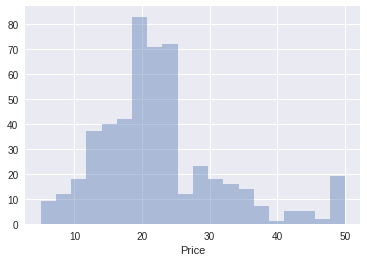

In [26]:
sns.distplot(df['Price'],bins=20,kde=False)
print("Skewness: %f" % df['Price'].skew())
print("Kurtosis: %f" % df['Price'].kurt())

The histogram shows the distribution of median house prices. Although the prices are spread across the entire domain, the most common ones are in between 15 to 25 thousand dollars.